<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9128303959052149 test Score 0.8707937877480586
Estimators =  50 Train Score 0.9214447615849564 test Score 0.912747695242132
Estimators =  100 Train Score 0.9213881316837911 test Score 0.9181440647595758
Estimators =  250 Train Score 0.9203382194235182 test Score 0.9170826225226933
Estimators =  450 Train Score 0.9216463286786598 test Score 0.9183548706705736


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

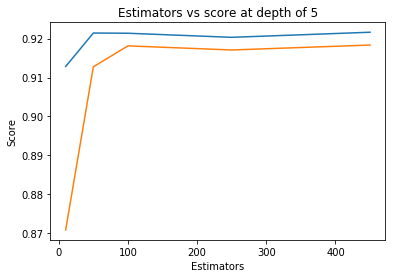

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8786209385515186 test Score 0.8596559642965466
depth =  9 Train Score 0.9574483286552693 test Score 0.9228689701782546
depth =  11 Train Score 0.9603514373747953 test Score 0.9244026800387679
depth =  15 Train Score 0.9625799898425597 test Score 0.9143051800123485
depth =  20 Train Score 0.9636710892577768 test Score 0.9251697810773188
depth =  35 Train Score 0.963683290655611 test Score 0.92511552338953
depth =  50 Train Score 0.963683290655611 test Score 0.92511552338953
depth =  70 Train Score 0.963683290655611 test Score 0.92511552338953
depth =  130 Train Score 0.963683290655611 test Score 0.92511552338953


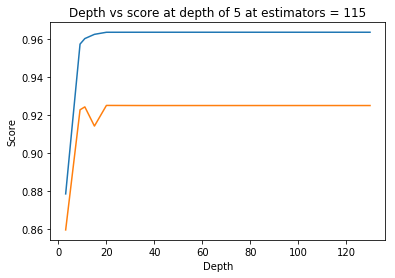

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96204957 0.96128263 0.95981394 0.96123824 0.96335889]
mean train scores [0.96303618 0.96221892 0.96039219 0.96181684 0.96448908]


In [9]:
sp_randint(105,125)

In [10]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [12]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [13]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9653868439510842
Test f1 score 0.9263349027722062


In [14]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


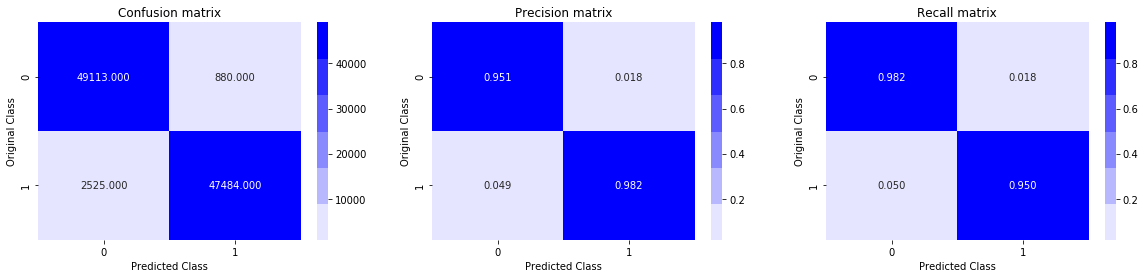

Test confusion_matrix


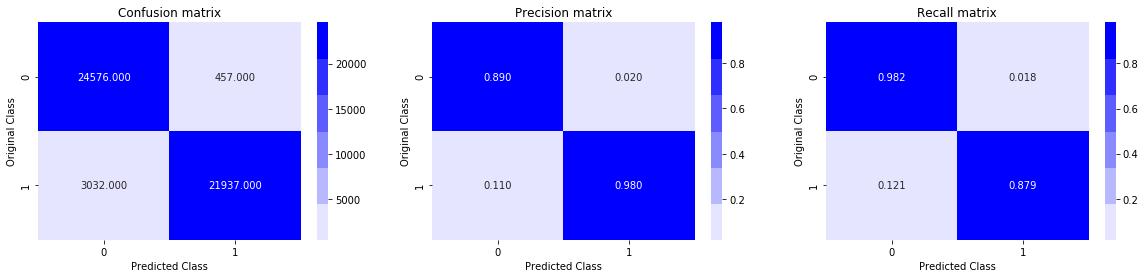

In [15]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

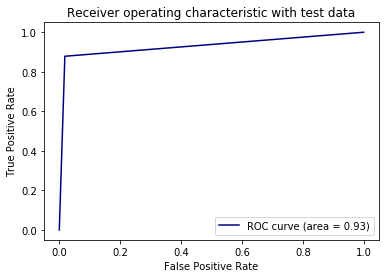

In [16]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

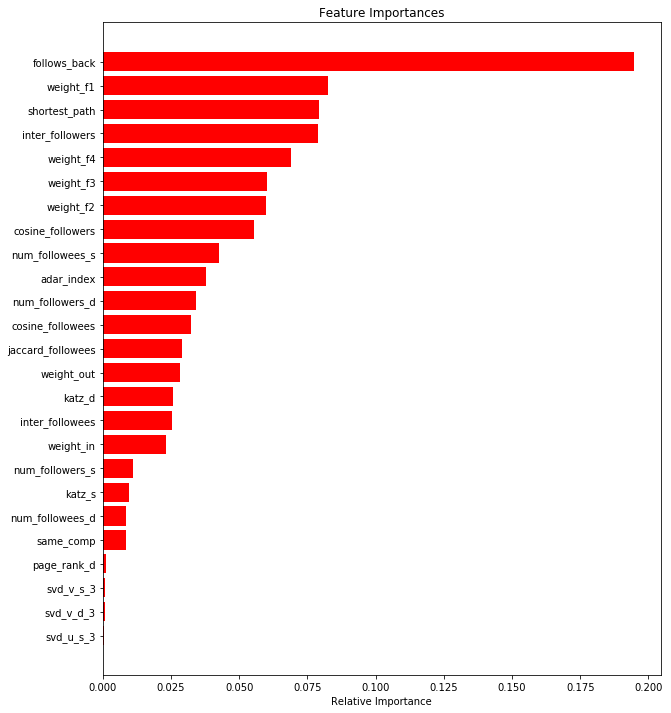

In [17]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

# <============================================================>

In [6]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [7]:
num_followers_s = list(df_final_train['num_followers_s'])
num_followers_d = list(df_final_train['num_followers_d'])
num_followees_s = list(df_final_train['num_followees_s'])
num_followees_d = list(df_final_train['num_followees_d'])

preferential_followers_train = []
for i in range(df_final_train.shape[0]):
    res = num_followers_s[i] * num_followers_d[i]
    preferential_followers_train.append(res)

preferential_followees_train = []
for i in range(df_final_train.shape[0]):
    res = num_followees_s[i] * num_followees_d[i]
    preferential_followees_train.append(res)

num_followers_s = list(df_final_test['num_followers_s'])
num_followers_d = list(df_final_test['num_followers_d'])
num_followees_s = list(df_final_test['num_followees_s'])
num_followees_d = list(df_final_test['num_followees_d'])

    
preferential_followers_test = []
for i in range(df_final_test.shape[0]):
    res = num_followers_s[i] * num_followers_d[i]
    preferential_followers_test.append(res)

preferential_followees_test = []
for i in range(df_final_test.shape[0]):
    res = num_followees_s[i] * num_followees_d[i]
    preferential_followees_test.append(res)

print("preferential_followers_train ",len(preferential_followers_train))
print("preferential_followees_train ",len(preferential_followees_train))
print("preferential_followers_test ",len(preferential_followers_test))
print("preferential_followees_test ",len(preferential_followees_test))

preferential_followers_train  100002
preferential_followees_train  100002
preferential_followers_test  50002
preferential_followees_test  50002


In [46]:
ss = df_final_train[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5']].values
dd = df_final_train[['svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5']].values

In [50]:
np.dot(ss[0],dd[0])

1.1149274107932878e-11

In [8]:
ss = df_final_train[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5']].values
dd = df_final_train[['svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5']].values
svd_u_dot_train = []
for i in range(df_final_train.shape[0]):
    res = np.dot(ss[i],dd[i])
    svd_u_dot_train.append(res)

ss = df_final_test[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5']].values
dd = df_final_test[['svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5']].values
svd_u_dot_test = []
for i in range(df_final_test.shape[0]):
    res = np.dot(ss[i],dd[i])
    svd_u_dot_test.append(res)
    
print("svd_dot_train ",len(svd_u_dot_train))
print("svd_dot_test ",len(svd_u_dot_test))

svd_dot_train  100002
svd_dot_test  50002


In [9]:
ss = df_final_train[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5']].values
dd = df_final_train[['svd_v_d_1','svd_v_d_2','svd_v_d_3','svd_v_d_4','svd_v_d_5']].values
svd_v_dot_train = []
for i in range(df_final_train.shape[0]):
    res = np.dot(ss[i],dd[i])
    svd_v_dot_train.append(res)

ss = df_final_test[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5']].values
dd = df_final_test[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5']].values
svd_v_dot_test = []
for i in range(df_final_test.shape[0]):
    res = np.dot(ss[i],dd[i])
    svd_v_dot_test.append(res)
    
print("svd_dot_train ",len(svd_v_dot_train))
print("svd_dot_test ",len(svd_v_dot_test))

svd_dot_train  100002
svd_dot_test  50002


In [10]:
#https://stackoverflow.com/a/51308247
dataset_train = pd.DataFrame({'preferential_followers_train': preferential_followers_train, 'preferential_followees_train': preferential_followees_train,'svd_u_dot_train':svd_u_dot_train,'svd_v_dot_train':svd_v_dot_train})
#https://stackoverflow.com/a/51308247
dataset_test = pd.DataFrame({'preferential_followers_test': preferential_followers_test, 'preferential_followees_test': preferential_followees_test,'svd_u_dot_test':svd_u_dot_test,'svd_v_dot_test':svd_v_dot_test})

In [11]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((df_final_train,dataset_train))
X_te = hstack((df_final_test,dataset_test))

print("Final Data matrix on BOW")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on BOW
(100002, 56) (100002,)
(50002, 56) (50002,)


In [12]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import time

start_time = time.time()
gbdt = xgb.XGBClassifier(n_jobs=-1,class_weight='balanced')
parameters = {'n_estimators': [10, 100, 500], 'max_depth':[10, 50, 100, 500]}
clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='f1',return_train_score=True)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 2740.791193962097 ms


In [13]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### With clf.best_estimator_ we are overfitting the model with those params , so we'll manually check the params using heatmaps

In [14]:
train_auc = train_auc.reshape(3,4) 
cv_auc = cv_auc.reshape(3,4) 
train_auc 
cv_auc


array([[0.97389823, 0.98041685, 0.98268328, 0.97457532],
       [0.97933999, 0.98121594, 0.97457532, 0.97933999],
       [0.98121594, 0.97457532, 0.97933999, 0.98121594]])

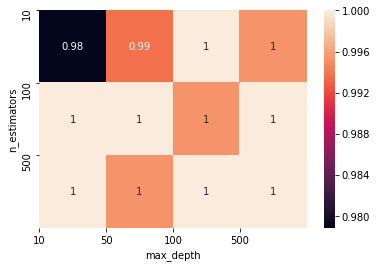

In [15]:
import matplotlib.pyplot as plt
# plt.show() 
import numpy as np; np.random.seed(0) 
import seaborn as sns 

sns.heatmap(train_auc,annot=True) 
plt.yticks(np.arange(3), [10, 100, 500])
plt.xticks(np.arange(4), [10, 50, 100, 500]) 
plt.xlabel('max_depth') 
plt.ylabel('n_estimators') 
plt.show()

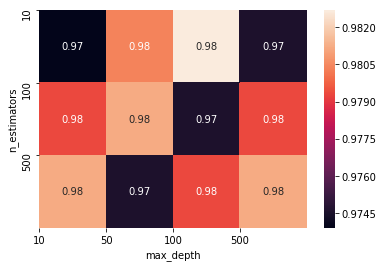

In [16]:
import matplotlib.pyplot as plt
# plt.show() 
import numpy as np; np.random.seed(0) 
import seaborn as sns 

sns.heatmap(cv_auc,annot=True) 
plt.yticks(np.arange(3), [10, 100, 500])
plt.xticks(np.arange(4), [10, 50, 100, 500])  
plt.xlabel('max_depth') 
plt.ylabel('n_estimators') 
plt.show()

In [17]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [19]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.977334523761211
Test f1 score 0.933524912310358


In [20]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


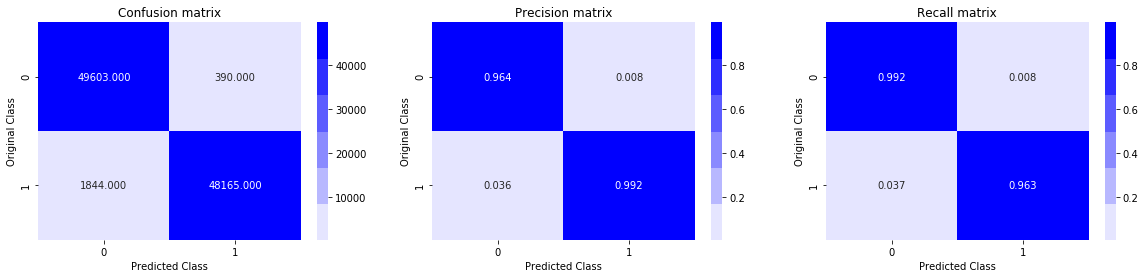

Test confusion_matrix


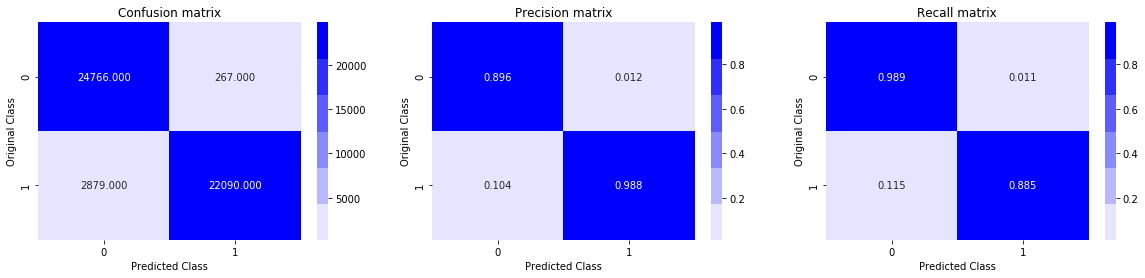

In [21]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

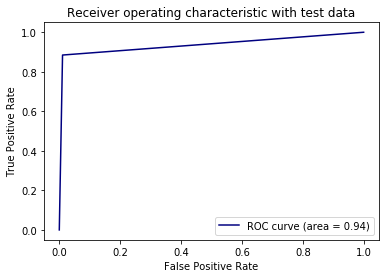

In [22]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

In [23]:
names = df_final_train.columns

In [24]:
names.append(dataset_train.columns)

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_followers_train', 'preferential_followees_train',
       'svd_u_dot_train', 'svd_v_dot_train'],
      dtype='object')

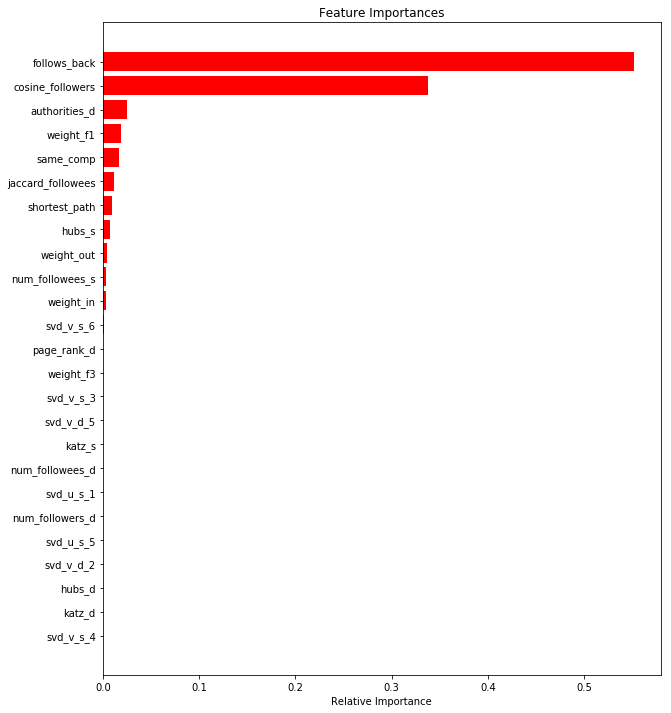

In [25]:
# features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Results(Pretty Table):

In [26]:
from prettytable import PrettyTable
x = PrettyTable()


x.field_names = [ "Model", "Hyperparameters(max_depth,n_estimators)" , "Test F1"] 
x.add_row([ "RF","(14,121)", 0.92]) 
x.add_row([ "GBDT After Feature Engineering", "(10,10)", 0.93])
print(x)

+--------------------------------+-----------------------------------------+---------+
|             Model              | Hyperparameters(max_depth,n_estimators) | Test F1 |
+--------------------------------+-----------------------------------------+---------+
|               RF               |                 (14,121)                |   0.92  |
| GBDT After Feature Engineering |                 (10,10)                 |   0.93  |
+--------------------------------+-----------------------------------------+---------+


# Step by Step Procedure:

1. For the 1st part of the assignment i.e for preferential attachment of followers and followees , i created two more features i.e  preferential_followers_train and prefere ntial_followees_train i.e I multiplied number of followers of source node and destination node  
2. Also did the same thing for followees as in the 1st point 
3. For the 2nd part of the assignment I have created a new features called svd_u_dot and svd_v_dot where I took dot product of source node and destination node of reduced dimensions from matrix factorization  
4. For these new features I created a new dataframe and then hstacked both train and test features finally 
5. Then I hyperparameter tuned XGBoost with n_estimators and max_depth as hyper params  
6. With clf.bestestimator we are overfitting the model with those params , so we'll manually check the params using heatmaps 
7. The best params I got is 10 for max_depth and 10 for n_estimators 
8. Now I applied XGBoost using these parameters 
9. Got test F1 score of 0.93 and train F1 score of 0.97 
10. Got AUC of 0.94 
11. Found out that most important features are follows_back and cosine_followers 